In [1]:

import os
os.getcwd()

'/content'

In [2]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# if running in Google colab - you should upload the Project2_training.csv to the sample_data folder available when you start the notebook

# change the directory to sample_data
%cd sample_data
%ls

# reading training file
df = pd.read_csv('Project2_training.csv')

# normalize stock and call prices in relation to the option's strike price
df['Stock Price'] = df['Stock Price']/df['Strike Price']
df['Call Price']  = df['Call Price'] /df['Strike Price']

# split data into training and testing sets
n = 3000
n_train =  (int)(0.8 * n)

# select training set and define independent and dependent variable (call price)
train = df[0:n_train]
X_train = train[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_train = train['Call Price'].values

# select testing set and define independent and dependent variable (call price)
test = df[n_train+1:n]
X_test = test[['Stock Price', 'Maturity', 'Dividends', 'Volatility', 'Risk-free']].values
y_test = test['Call Price'].values

Load Tensor Flow Keras

In [3]:
# to build the neural we will use Keras due to its friendly API
# https://keras.io/api/

# importing Keras classes to build the neural networks
from keras.models import Sequential # https://keras.io/api/models/sequential/

# keras provides layers api to construct the neural network
from keras.layers import Dense, Dropout, Activation, LeakyReLU, ReLU #https://keras.io/api/layers/

from keras import backend
def custom_activation(x):
    return backend.exp(x)

Single Neural Network

Epoch 1/100
34/34 - 0s - loss: 0.1700 - val_loss: 0.0590
Epoch 2/100
34/34 - 0s - loss: 0.0550 - val_loss: 0.0560
Epoch 3/100
34/34 - 0s - loss: 0.0508 - val_loss: 0.0502
Epoch 4/100
34/34 - 0s - loss: 0.0454 - val_loss: 0.0432
Epoch 5/100
34/34 - 0s - loss: 0.0384 - val_loss: 0.0346
Epoch 6/100
34/34 - 0s - loss: 0.0300 - val_loss: 0.0250
Epoch 7/100
34/34 - 0s - loss: 0.0213 - val_loss: 0.0163
Epoch 8/100
34/34 - 0s - loss: 0.0136 - val_loss: 0.0096
Epoch 9/100
34/34 - 0s - loss: 0.0082 - val_loss: 0.0057
Epoch 10/100
34/34 - 0s - loss: 0.0052 - val_loss: 0.0039
Epoch 11/100
34/34 - 0s - loss: 0.0037 - val_loss: 0.0030
Epoch 12/100
34/34 - 0s - loss: 0.0030 - val_loss: 0.0025
Epoch 13/100
34/34 - 0s - loss: 0.0025 - val_loss: 0.0021
Epoch 14/100
34/34 - 0s - loss: 0.0022 - val_loss: 0.0019
Epoch 15/100
34/34 - 0s - loss: 0.0019 - val_loss: 0.0017
Epoch 16/100
34/34 - 0s - loss: 0.0017 - val_loss: 0.0015
Epoch 17/100
34/34 - 0s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/100
34/34 - 0s

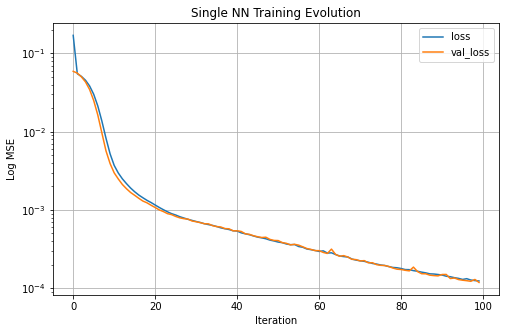

In [10]:
# for this NN we will define it with 300 neurons
nodes = 300
# initialize the mode as Sequential class - the next steps we will add layers to it 
model = Sequential()

# to add a layer we call the add method from model (Sequential) and pass as argument the Dense class
# https://keras.io/api/layers/core_layers/dense/
model.add(Dense(nodes, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# since we want to predict a single value we add one additional layer with one neuron 
model.add(Dense(1))
# we will use our customized activation function
model.add(Activation(custom_activation))


# https://keras.io/api/models/model_training_apis/

# compile the model
model.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'

# fit the model
history = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
# print the model parameters
print(model.summary())

# plot the model learning history
pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('Single NN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Deep Neural Network (DNN)

Epoch 1/100
5/5 - 1s - loss: 0.5590 - val_loss: 0.2596
Epoch 2/100
5/5 - 0s - loss: 0.2174 - val_loss: 0.1144
Epoch 3/100
5/5 - 0s - loss: 0.1024 - val_loss: 0.0668
Epoch 4/100
5/5 - 0s - loss: 0.0637 - val_loss: 0.0565
Epoch 5/100
5/5 - 0s - loss: 0.0547 - val_loss: 0.0586
Epoch 6/100
5/5 - 0s - loss: 0.0547 - val_loss: 0.0608
Epoch 7/100
5/5 - 0s - loss: 0.0553 - val_loss: 0.0603
Epoch 8/100
5/5 - 0s - loss: 0.0540 - val_loss: 0.0575
Epoch 9/100
5/5 - 0s - loss: 0.0513 - val_loss: 0.0533
Epoch 10/100
5/5 - 0s - loss: 0.0477 - val_loss: 0.0481
Epoch 11/100
5/5 - 0s - loss: 0.0437 - val_loss: 0.0423
Epoch 12/100
5/5 - 0s - loss: 0.0393 - val_loss: 0.0364
Epoch 13/100
5/5 - 0s - loss: 0.0347 - val_loss: 0.0312
Epoch 14/100
5/5 - 0s - loss: 0.0299 - val_loss: 0.0258
Epoch 15/100
5/5 - 0s - loss: 0.0241 - val_loss: 0.0199
Epoch 16/100
5/5 - 0s - loss: 0.0184 - val_loss: 0.0138
Epoch 17/100
5/5 - 0s - loss: 0.0129 - val_loss: 0.0091
Epoch 18/100
5/5 - 0s - loss: 0.0083 - val_loss: 0.0055
E

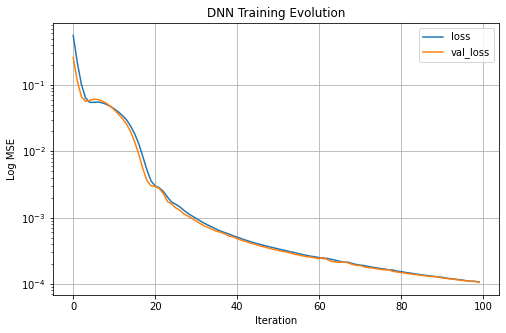

In [11]:
# for the DNN we will continue to use 300 neurons - but instead of a single layer of 300 neurons, we will use 3 layers of 100 neurons each

# number of neurons per layer
nodes2 = 100

# initialize our new model as sequential class
model2 = Sequential()

# add the first layer of 100 neurons - for the first layer you must declare the number of features through input_dim arguments
model2.add(Dense(nodes2, activation='relu', input_dim=X_train.shape[1])) # activation = 'relu', 'tanh', 'sigmoid'

# add second layer of 100 neurons - no need to declare the input dimensions, keras does that automatically
model2.add(Dense(nodes2, activation='relu'))

# add third layer of 100 neurons 
model2.add(Dense(nodes2, activation='relu'))

# output layer is the same as the single NN
model2.add(Dense(1))
model2.add(Activation(custom_activation))


# compile and fit the model
model2.compile(loss='mse', optimizer='adam') # optimizer = 'rmsprop', 'sgd', 'adam'
history = model2.fit(X_train, y_train, batch_size=512, epochs=100, validation_split=0.1, verbose=2,
                          validation_data=(X_test, y_test))
print()
print(model2.summary())


pd.DataFrame(history.history).plot(figsize=(8,5), logy=True)
plt.title('DNN Training Evolution')
plt.ylabel('Log MSE')
plt.xlabel('Iteration')
plt.grid(True)

Plot comparison

In [6]:
def CheckAccuracy(y, y_hat):
    stats = dict()

    stats['diff'] = y - y_hat

    stats['mse'] = np.mean(stats['diff'] ** 2)
    print
    "Mean Squared Error:      ", stats['mse']

    stats['rmse'] = np.sqrt(stats['mse'])
    print
    "Root Mean Squared Error: ", stats['rmse']

    stats['mae'] = np.mean(abs(stats['diff']))
    print
    "Mean Absolute Error:     ", stats['mae']

    stats['mpe'] = np.sqrt(stats['mse']) / np.mean(y)
    print
    "Mean Percent Error:      ", stats['mpe']

    # plots
    # mpl.rcParams['agg.path.chunksize'] = 100000
    plt.figure(figsize=(14, 10))
    plt.scatter(y, y_hat, color='black', linewidth=0.3, alpha=0.4, s=0.5)
    plt.xlabel('Actual Price', fontsize=20, fontname='Times New Roman')
    plt.ylabel('Predicted Price', fontsize=20, fontname='Times New Roman')
    plt.show()

    plt.figure(figsize=(14, 10))
    plt.hist(stats['diff'], bins=50, edgecolor='black', color='white')
    plt.xlabel('Diff')
    plt.ylabel('Density')
    plt.show()

    return stats

Show SNN

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


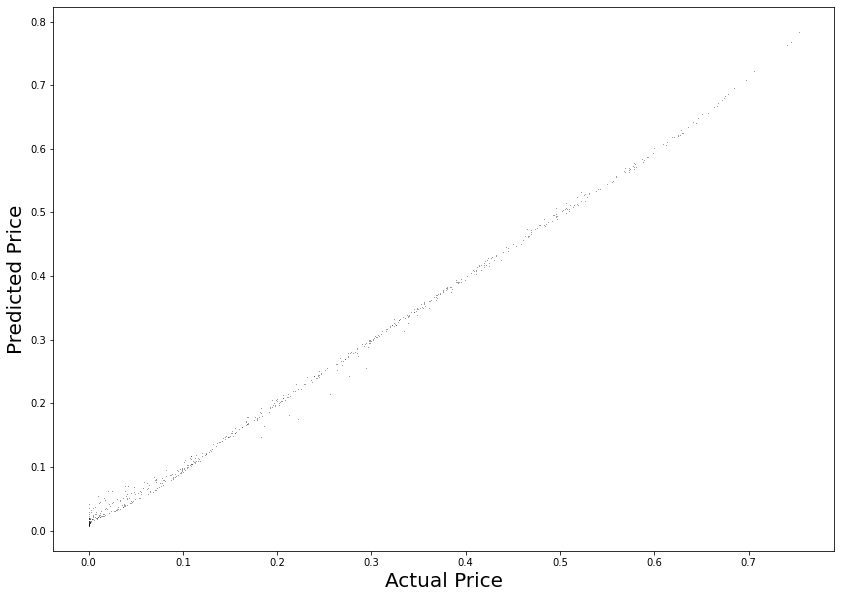

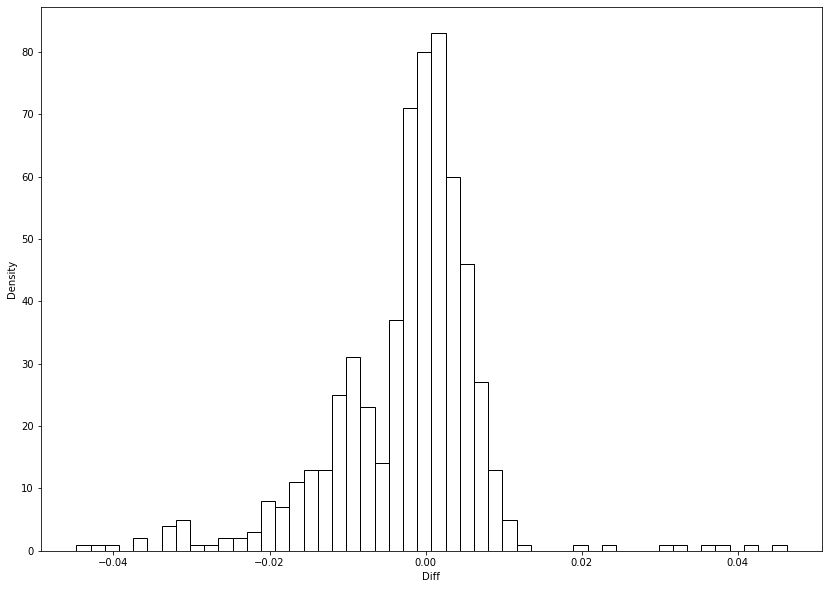

{'diff': array([ 3.35594356e-03,  1.74152201e-03, -1.25778196e-03, -2.82020457e-03,
        -8.51071690e-03, -1.32134945e-04, -5.61372868e-04, -3.54335490e-03,
        -2.42653220e-03,  6.76855111e-03, -4.05725356e-04, -1.22559474e-03,
        -1.14341380e-03,  5.63656589e-04,  9.52067531e-04, -8.20174627e-03,
         7.02937075e-03, -1.71332744e-02, -2.38319417e-03, -1.00346544e-02,
         4.13105178e-04, -9.16973294e-03, -3.44184511e-03,  1.38551614e-03,
        -1.70320300e-03,  2.30896571e-03, -2.32259292e-03, -2.27651314e-03,
         6.78032193e-03,  3.88451328e-03,  1.88590843e-03,  5.75234615e-03,
         6.44758351e-04, -2.79435178e-03,  2.28988508e-03,  1.09591644e-02,
        -1.25236597e-02,  4.11774118e-03, -7.16541265e-04, -2.08640779e-03,
        -1.09668296e-02,  2.89580832e-03,  4.02406389e-03, -1.09634706e-02,
        -2.27506335e-02,  4.80292529e-03, -1.13319797e-02, -1.12526591e-02,
         3.16266718e-03,  3.62252837e-03, -2.19871355e-03, -1.07856629e-02,
    

In [7]:
y_test_hat = model.predict(X_test)

y_test_hat = np.squeeze(y_test_hat)

CheckAccuracy(y_test, y_test_hat)

Show DNN

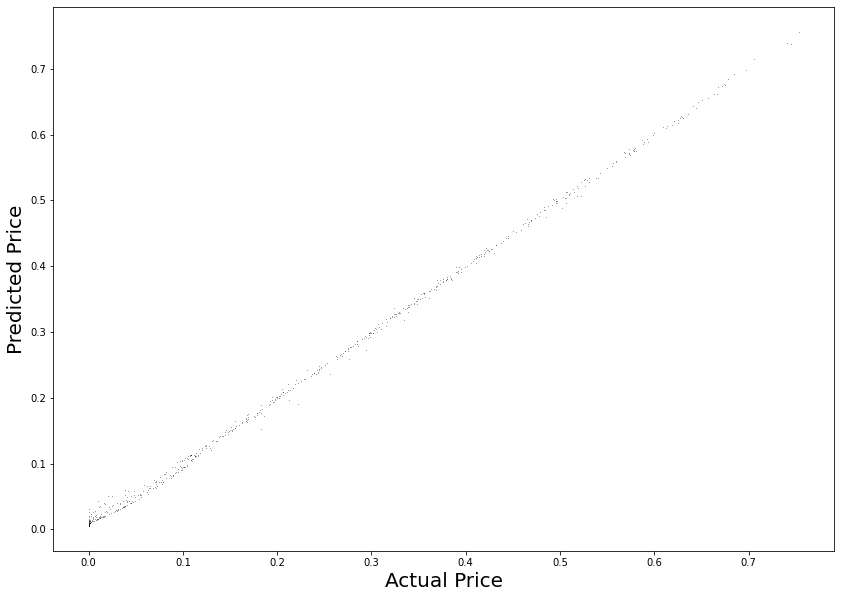

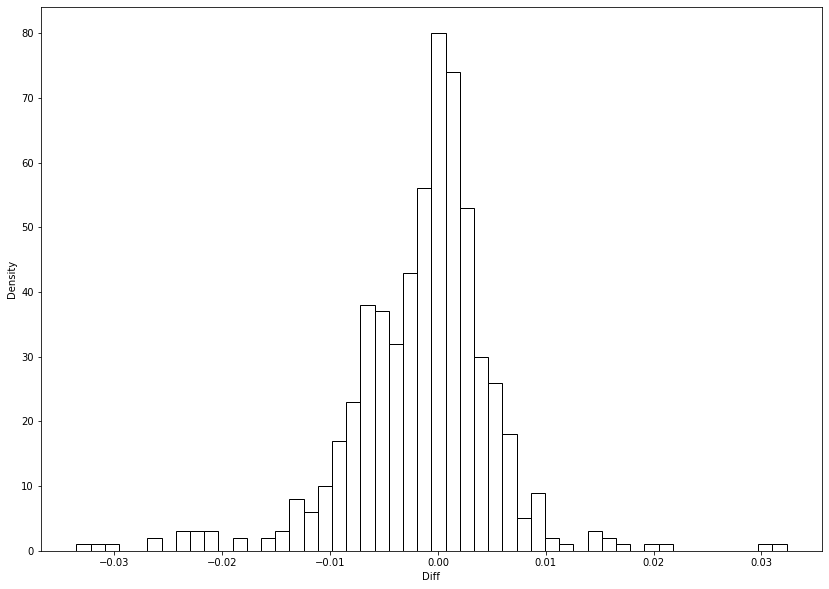

{'diff': array([ 2.22327649e-03,  8.08053664e-04, -3.14188478e-03,  4.60378118e-03,
        -6.27250289e-03,  9.44444149e-04, -3.96587097e-03,  2.65568462e-03,
         1.18309528e-03,  4.75105309e-03, -2.51441848e-03, -7.52453074e-04,
        -6.02620857e-04, -1.47127579e-03,  2.96026722e-03, -5.70111116e-03,
         1.94676348e-03, -9.97911700e-03,  1.31795625e-03, -5.63347721e-03,
        -8.15733981e-04, -1.17286087e-03, -9.07785170e-03, -1.43715122e-03,
         5.79845506e-03,  8.71433416e-03,  7.18229299e-04, -5.65144578e-04,
         4.94073633e-03, -5.51874528e-03,  7.37595147e-04,  7.40765655e-03,
        -1.58235430e-03,  8.06981350e-04, -4.26456948e-03,  3.96452954e-03,
        -8.31314753e-03,  7.05559941e-05,  2.00432136e-03,  1.81059417e-03,
        -7.80774059e-03, -5.28507074e-03, -4.69924724e-03, -6.70766447e-03,
         1.82758021e-03, -4.79185790e-03, -8.30062899e-03, -7.40909831e-03,
         3.23049727e-03, -1.21628664e-05, -3.50733353e-03, -7.10376480e-03,
    

In [8]:
y2_test_hat = model2.predict(X_test)

y2_test_hat = np.squeeze(y2_test_hat)

CheckAccuracy(y_test, y2_test_hat)